# Pokemon Stat and Type Analysis <a id='top'></a>
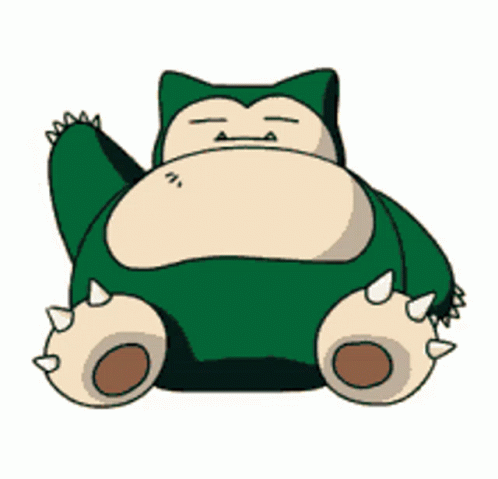
## ___🛠️Work in progress🛠️___

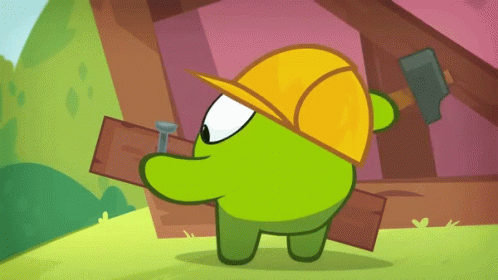

## 1. Overview<a id='overview'></a>
<div style="text-align: right"> <a href="#top">Go to Top</a> </div>
This project will use pandas to apply a comparative analysis of Pokémon; their distribution across diferent parameters and their stats categorized by their types, generations other affinities. This will be done by merging csv files, cleaning the data, displaying diagrams that shows distributions and finally applying aggregate pandas functions to support decision making in collecting and training the strongest Pokémon team for each generation.
Only default Pokemon are included in the analysis, so all Mega and GMax evolutions will be allocated to their separate DataFrame, enabling future inclusion or particular analysis for these species.
CSV files used are downloaded from Pokeapi's Github 04-04-2024: [https://github.com/PokeAPI/pokeapi/tree/master/data/v2/csv]

## 2. Contents<a id='contents'></a>
1. [Overview](#overview)
2. [Contents](#contents)
3. [Import pandas and define DataFrames](#Import)
4. [Inspect for missing data and incorrect data types](#inspect)
5. [Merging](#merge)
6. [Sorting out all the alternate forms](#Sorting)
8. [Analyses](#analyses)

## Import pandas and define DataFrames:<a id='Import'></a>

In [1]:
import pandas as pd

pokemon = pd.read_csv('pokemon.csv')
pokemon_types = pd.read_csv('pokemon_types.csv')
types = pd.read_csv('types.csv')
pokemon_stats = pd.read_csv('pokemon_stats.csv')
pokemon_species = pd.read_csv('pokemon_species.csv')


print(pokemon.head(2))
print(pokemon_types.head(2))
print(types.head(2))
print(pokemon_stats.head(2))
print(pokemon_species.head(2))

   id identifier  species_id  height  weight  base_experience  order  \
0   1  bulbasaur           1       7      69             64.0    1.0   
1   2    ivysaur           2      10     130            142.0    2.0   

   is_default  is_starter  
0           1           1  
1           1           1  
   pokemon_id  type_id  slot
0           1       12     1
1           1        4     2
   id identifier  generation_id  damage_class_id
0   1     normal              1              2.0
1   2   fighting              1              2.0
   pokemon_id  stat_id  base_stat  effort
0           1        1         45       0
1           1        2         49       0
   id identifier  generation_id  evolves_from_species_id  evolution_chain_id  \
0   1  bulbasaur              1                      NaN                   1   
1   2    ivysaur              1                      1.0                   1   

   color_id  shape_id  habitat_id  gender_rate  capture_rate  base_happiness  \
0         5       

## Inspecting for missing data and incorrect data types:<a id='inspect'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

In [2]:
print(pokemon.info())
print(pokemon.describe())
print(pokemon.value_counts())

print(pokemon_types.info())

print(types.info())

print(pokemon_stats.info())
print(pokemon_species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1302 non-null   int64  
 1   identifier       1302 non-null   object 
 2   species_id       1302 non-null   int64  
 3   height           1302 non-null   int64  
 4   weight           1302 non-null   int64  
 5   base_experience  1253 non-null   float64
 6   order            1212 non-null   float64
 7   is_default       1302 non-null   int64  
 8   is_starter       1302 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 91.7+ KB
None
                 id   species_id       height        weight  base_experience  \
count   1302.000000  1302.000000  1302.000000   1302.000000      1253.000000   
mean    2560.927803   507.113671    20.467742    980.863287       163.577015   
std     3949.887748   305.203194    54.180316   1972.645170        86.031357   


## Cleaning & Merging<a id='merge'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>
After inspecting the data in each df, it is found that the format in which the primary and secondary type_id's are allocated to 'slots' can be difficult to read and to merge with other tables since, the pokemon_id in this way is duplicated. The same goes for the stats.
Therefore, we will pivot some of the type- and stats data before we will merge the df's.

In [3]:
# Pivot the DataFrame to have separate columns for each slot
pivoted_pokemon_types = pokemon_types.pivot(index='pokemon_id', columns='slot', values='type_id').reset_index()

# Rename the columns
pivoted_pokemon_types.columns.name = None  # Remove the name of the columns
pivoted_pokemon_types.rename(columns={1: 'type_id_1', 2: 'type_id_2'}, inplace=True)
pivoted_pokemon_types.fillna(0, inplace=True) # Set NaN values to 0, so we can change the datatype of type_id_2 to integer
pivoted_pokemon_types = pivoted_pokemon_types.astype({'type_id_1': int, 'type_id_2': int})



# Pivot the DataFrame
pivoted_pokemon_stats = pokemon_stats.pivot(index='pokemon_id', columns='stat_id', values='base_stat').reset_index()

# Rename the columns
pivoted_pokemon_stats.columns.name = None  # Remove the name of the columns
pivoted_pokemon_stats.rename(columns={1: 'hp', 2: 'atk', 3: 'def', 4: 'sp_atk', 5: 'sp_def', 6: 'speed'}, inplace=True)

# Merge 'effort' column
final_pokemon_stats = pivoted_pokemon_stats.merge(pokemon_stats['pokemon_id'].drop_duplicates(), on='pokemon_id')


print(pivoted_pokemon_types.head())
print(final_pokemon_stats.head())
print(final_pokemon_stats.info())

   pokemon_id  type_id_1  type_id_2
0           1         12          4
1           2         12          4
2           3         12          4
3           4         10          0
4           5         10          0
   pokemon_id  hp  atk  def  sp_atk  sp_def  speed
0           1  45   49   49      65      65     45
1           2  60   62   63      80      80     60
2           3  80   82   83     100     100     80
3           4  39   52   43      60      50     65
4           5  58   64   58      80      65     80
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   pokemon_id  1302 non-null   int64
 1   hp          1302 non-null   int64
 2   atk         1302 non-null   int64
 3   def         1302 non-null   int64
 4   sp_atk      1302 non-null   int64
 5   sp_def      1302 non-null   int64
 6   speed       1302 non-null   int64
dtypes: int64(7)
memo

In [4]:
pokemon_with_types = pokemon.merge(pivoted_pokemon_types, left_on='id', right_on='pokemon_id', how='inner')
pokemon_with_types = pokemon_with_types.merge(types, left_on='type_id_1', right_on='id', how='inner')
pokemon_with_types = pokemon_with_types.merge(types, left_on='type_id_2', right_on='id', how='left')
pokemon_with_stats = pokemon_with_types.merge(final_pokemon_stats, left_on='id_x', right_on='pokemon_id', how='inner')

pokemon_with_stats.head()
# print(pokemon_with_stats.info())

id_x identifier_x  species_id  height  weight  base_experience  order  \
0     1    bulbasaur           1       7      69             64.0    1.0   
1     2      ivysaur           2      10     130            142.0    2.0   
2     3     venusaur           3      20    1000            263.0    3.0   
3     4   charmander           4       6      85             62.0    5.0   
4     5   charmeleon           5      11     190            142.0    6.0   

   is_default  is_starter  pokemon_id_x  ...  identifier  generation_id_y  \
0           1           1             1  ...      poison              1.0   
1           1           1             2  ...      poison              1.0   
2           1           1             3  ...      poison              1.0   
3           1           1             4  ...         NaN              NaN   
4           1           1             5  ...         NaN              NaN   

   damage_class_id_y pokemon_id_y  hp  atk  def sp_atk  sp_def  speed  
0                2.0            1  45   49   49     65      65     45  
1                2.0            2  60   62   63     80      80     60  
2                2.0            3  80   82   83    100     100     80  
3                NaN            4  39   52   43     60      50     65  
4                NaN            5  58   64   58     80      65     80  

[5 rows x 27 columns]

With so many columns it can be hard to oversee, so we can drop some of the columns, we definitely don't need

In [5]:
# cleaning - drop columns we don't want 
columns_to_drop = ['base_experience', 'pokemon_id_x', 'pokemon_id_y', 'type_id_1', 
                   'type_id_2', 'id_y', 'id', 'generation_id_y', 'damage_class_id_x', 'damage_class_id_y']
pokemon_with_stats.drop(columns_to_drop, axis=1, inplace=True)
pokemon_with_stats.head()

id_x identifier_x  species_id  height  weight  order  is_default  \
0     1    bulbasaur           1       7      69    1.0           1   
1     2      ivysaur           2      10     130    2.0           1   
2     3     venusaur           3      20    1000    3.0           1   
3     4   charmander           4       6      85    5.0           1   
4     5   charmeleon           5      11     190    6.0           1   

   is_starter identifier_y  generation_id_x identifier  hp  atk  def  sp_atk  \
0           1        grass                1     poison  45   49   49      65   
1           1        grass                1     poison  60   62   63      80   
2           1        grass                1     poison  80   82   83     100   
3           1         fire                1        NaN  39   52   43      60   
4           1         fire                1        NaN  58   64   58      80   

   sp_def  speed  
0      65     45  
1      80     60  
2     100     80  
3      50     65  
4      65     80

I ran into some trouble when trying to merge the last df, due to some duplicate columns, so to avoid the issue, I chose to rename some of the troubling columns and some of the columns I wanted to change the name of anyway.

In [6]:
# ...and rename columns
pokemon_with_stats = pokemon_with_stats.rename(columns={'id_x': 'id', 'identifier_x': 'name',
                                                        'identifier_y': 'type_1', 'generation_id_x': 'generation', 'identifier': 'type_2'})

pokemon_final = pokemon_with_stats.merge(pokemon_species, left_on='species_id', right_on='id', how='inner')

# pokemon_final.head()
# pokemon_final.tail()
pokemon_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_x                     1302 non-null   int64  
 1   name                     1302 non-null   object 
 2   species_id               1302 non-null   int64  
 3   height                   1302 non-null   int64  
 4   weight                   1302 non-null   int64  
 5   order_x                  1212 non-null   float64
 6   is_default               1302 non-null   int64  
 7   is_starter               1302 non-null   int64  
 8   type_1                   1302 non-null   object 
 9   generation               1302 non-null   int64  
 10  type_2                   726 non-null    object 
 11  hp                       1302 non-null   int64  
 12  atk                      1302 non-null   int64  
 13  def                      1302 non-null   int64  
 14  sp_atk                  

Last df had a lot of columns and the names of the duplicate columns were again an issue, so I renamed and dropped columns once again

In [7]:
# cleaning - drop columns we don't want and rename columns
columns_to_drop = ['id_y', 'identifier', 'color_id', 'shape_id', 
                   'habitat_id', 'generation', 'gender_rate', 'capture_rate', 'hatch_counter', 
                   'has_gender_differences', 'growth_rate_id', 'forms_switchable', 'order_y', 
                   'conquest_order']
pokemon_final.drop(columns_to_drop, axis=1, inplace=True)

print(pokemon_final.head())
print(pokemon_final.tail())

   id_x        name  species_id  height  weight  order_x  is_default  \
0     1   bulbasaur           1       7      69      1.0           1   
1     2     ivysaur           2      10     130      2.0           1   
2     3    venusaur           3      20    1000      3.0           1   
3     4  charmander           4       6      85      5.0           1   
4     5  charmeleon           5      11     190      6.0           1   

   is_starter type_1  type_2  ...  sp_atk  sp_def  speed  generation_id  \
0           1  grass  poison  ...      65      65     45              1   
1           1  grass  poison  ...      80      80     60              1   
2           1  grass  poison  ...     100     100     80              1   
3           1   fire     NaN  ...      60      50     65              1   
4           1   fire     NaN  ...      80      65     80              1   

   evolves_from_species_id  evolution_chain_id  base_happiness  is_baby  \
0                      NaN               

In [8]:
pokemon_final = pokemon_final.rename(columns={'id_x': 'id', 'order_x': 'order', 'generation_id': 'generation'})

print(pokemon_final.head())
print(pokemon_final.tail())

   id        name  species_id  height  weight  order  is_default  is_starter  \
0   1   bulbasaur           1       7      69    1.0           1           1   
1   2     ivysaur           2      10     130    2.0           1           1   
2   3    venusaur           3      20    1000    3.0           1           1   
3   4  charmander           4       6      85    5.0           1           1   
4   5  charmeleon           5      11     190    6.0           1           1   

  type_1  type_2  ...  sp_atk  sp_def  speed  generation  \
0  grass  poison  ...      65      65     45           1   
1  grass  poison  ...      80      80     60           1   
2  grass  poison  ...     100     100     80           1   
3   fire     NaN  ...      60      50     65           1   
4   fire     NaN  ...      80      65     80           1   

   evolves_from_species_id  evolution_chain_id  base_happiness  is_baby  \
0                      NaN                   1            50.0        0   
1       

2 of the columns were for some reason floats, where integers would be more suitable, so I set NaN values to 0, so we can change the datatype to integer

In [9]:
pokemon_final.fillna(0, inplace=True) # Set NaN values to 0, so we can change the datatype to integer
pokemon_final = pokemon_final.astype({'order': int, 'evolves_from_species_id': int, 'base_happiness': int})

print(pokemon_final.head())
print(pokemon_final.info())

   id        name  species_id  height  weight  order  is_default  is_starter  \
0   1   bulbasaur           1       7      69      1           1           1   
1   2     ivysaur           2      10     130      2           1           1   
2   3    venusaur           3      20    1000      3           1           1   
3   4  charmander           4       6      85      5           1           1   
4   5  charmeleon           5      11     190      6           1           1   

  type_1  type_2  ...  sp_atk  sp_def  speed  generation  \
0  grass  poison  ...      65      65     45           1   
1  grass  poison  ...      80      80     60           1   
2  grass  poison  ...     100     100     80           1   
3   fire       0  ...      60      50     65           1   
4   fire       0  ...      80      65     80           1   

   evolves_from_species_id  evolution_chain_id  base_happiness  is_baby  \
0                        0                   1              50        0   
1       

I wanted a cleaner classification of the different affinities Pokémon can have:

In [10]:
pokemon_final['pkmn_classes'] = ''

pokemon_final['pkmn_classes'] = 'Ordinary'
pokemon_final['pkmn_classes'] = pokemon_final['pkmn_classes'].where(pokemon_final['is_mythical'] != 1, 'Mythical')
pokemon_final['pkmn_classes'] = pokemon_final['pkmn_classes'].where(pokemon_final['is_legendary'] != 1, 'Legendary')
pokemon_final['pkmn_classes'] = pokemon_final['pkmn_classes'].where(pokemon_final['is_starter'] != 1, 'Starter')
pokemon_final['pkmn_classes'] = pokemon_final['pkmn_classes'].where(pokemon_final['is_baby'] != 1, 'Baby')
pokemon_final['type_2'] = pokemon_final['type_2'].where(pokemon_final['type_2'] != 0, 'Empty')


pokemon_final.drop(['is_mythical', 'is_legendary', 'is_starter', 'is_baby'], axis=1, inplace=True)

pokemon_final.head()

id        name  species_id  height  weight  order  is_default type_1  \
0   1   bulbasaur           1       7      69      1           1  grass   
1   2     ivysaur           2      10     130      2           1  grass   
2   3    venusaur           3      20    1000      3           1  grass   
3   4  charmander           4       6      85      5           1   fire   
4   5  charmeleon           5      11     190      6           1   fire   

   type_2  hp  atk  def  sp_atk  sp_def  speed  generation  \
0  poison  45   49   49      65      65     45           1   
1  poison  60   62   63      80      80     60           1   
2  poison  80   82   83     100     100     80           1   
3   Empty  39   52   43      60      50     65           1   
4   Empty  58   64   58      80      65     80           1   

   evolves_from_species_id  evolution_chain_id  base_happiness pkmn_classes  
0                        0                   1              50      Starter  
1                        1                   1              50      Starter  
2                        2                   1              50      Starter  
3                        0                   2              50      Starter  
4                        4                   2              50      Starter

I noticed, I'didn't have a 'total' column for the pokemon stats, so I added one right next to the stat-columns

In [11]:
pokemon_final['total'] = pokemon_final[['hp', 'atk', 'def', 'sp_atk', 'sp_def', 'speed']].sum(axis=1)
columns = list(pokemon_final.columns)
speed_index = columns.index('speed')
columns.insert(speed_index + 1, 'total')
pokemon_final = pokemon_final[columns]
pokemon_final = pokemon_final.loc[:,~pokemon_final.columns.duplicated()]

pokemon_final.head()

id        name  species_id  height  weight  order  is_default type_1  \
0   1   bulbasaur           1       7      69      1           1  grass   
1   2     ivysaur           2      10     130      2           1  grass   
2   3    venusaur           3      20    1000      3           1  grass   
3   4  charmander           4       6      85      5           1   fire   
4   5  charmeleon           5      11     190      6           1   fire   

   type_2  hp  ...  def  sp_atk  sp_def  speed  total  generation  \
0  poison  45  ...   49      65      65     45    318           1   
1  poison  60  ...   63      80      80     60    405           1   
2  poison  80  ...   83     100     100     80    525           1   
3   Empty  39  ...   43      60      50     65    309           1   
4   Empty  58  ...   58      80      65     80    405           1   

   evolves_from_species_id  evolution_chain_id  base_happiness  pkmn_classes  
0                        0                   1              50       Starter  
1                        1                   1              50       Starter  
2                        2                   1              50       Starter  
3                        0                   2              50       Starter  
4                        4                   2              50       Starter  

[5 rows x 21 columns]

I wanted to make the names of the pokemon and their types capitalized:

In [12]:
pokemon_final[['name', 'type_1', 'type_2']] = pokemon_final[['name', 'type_1', 'type_2']].astype(str).apply(lambda col: col.str.capitalize())

## Sorting out all the alternate forms: <a id='Sorting'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>
Lastly before we begin the analysis, I wanted to leave all the alternate forms like Mega, GMax and other

In [13]:
pokemon_alt_forms = pokemon_final[pokemon_final.is_default == 0]
pokemon_final = pokemon_final[pokemon_final.is_default == 1]
pokemon_alt_forms.drop('is_default', axis=1, inplace=True)
pokemon_final.drop('is_default', axis=1, inplace=True)

# pokemon_final.head()
pokemon_alt_forms.head()

id            name  species_id  height  weight  order   type_1  \
1025  10001   Deoxys-attack         386      17     608    515  Psychic   
1026  10002  Deoxys-defense         386      17     608    516  Psychic   
1027  10003    Deoxys-speed         386      17     608    517  Psychic   
1028  10004  Wormadam-sandy         413       5      65    543      Bug   
1029  10005  Wormadam-trash         413       5      65    544      Bug   

      type_2  hp  atk  def  sp_atk  sp_def  speed  total  generation  \
1025   Empty  50  180   20     180      20    150    600           3   
1026   Empty  50   70  160      70     160     90    600           3   
1027   Empty  50   95   90      95      90    180    600           3   
1028  Ground  60   79  105      59      85     36    424           4   
1029   Steel  60   69   95      69      95     36    424           4   

      evolves_from_species_id  evolution_chain_id  base_happiness pkmn_classes  
1025                        0                 202               0     Mythical  
1026                        0                 202               0     Mythical  
1027                        0                 202               0     Mythical  
1028                      412                 213              70     Ordinary  
1029                      412                 213              70     Ordinary

## Analyses<a id='analyses'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a,b = pokemon_final.shape

gen_types = np.unique(pokemon_final['generation'])
gen_sizes = []
number_of_gen_types = {}
for c in gen_types:
  a2,b2 = pokemon_final[pokemon_final["generation"].isin([c])].shape
  gen_sizes.append(a2/a*100)
  number_of_gen_types[c] = a2

print(number_of_gen_types)
print(gen_sizes)

{1: 151, 2: 100, 3: 135, 4: 107, 5: 156, 6: 72, 7: 88, 8: 96, 9: 120}
[14.73170731707317, 9.75609756097561, 13.170731707317074, 10.439024390243903, 15.21951219512195, 7.02439024390244, 8.585365853658537, 9.365853658536585, 11.707317073170733]


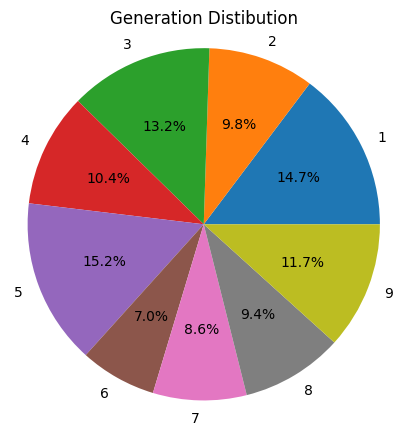

In [15]:
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(gen_sizes, labels=gen_types, autopct='%1.1f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Generation Distibution')
plt.show()

The 1st and 5th generation has produced most pokemon in comparison to the other generations.

In [16]:
leg_types = np.unique(pokemon_final['pkmn_classes'])
leg_sizes = []
number_of_leg_types = {}
for c in leg_types:
  a2,b2 = pokemon_final[pokemon_final["pkmn_classes"].isin([c])].shape
  leg_sizes.append(a2/a*100)
  number_of_leg_types[c] = a2

print(number_of_leg_types)
print(leg_sizes)

{'Baby': 19, 'Legendary': 71, 'Mythical': 23, 'Ordinary': 831, 'Starter': 81}
[1.8536585365853657, 6.926829268292684, 2.24390243902439, 81.07317073170732, 7.902439024390244]


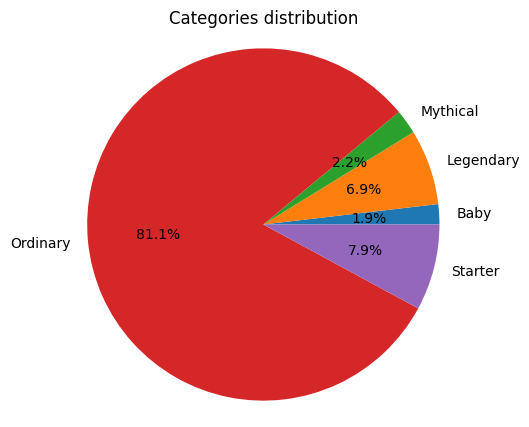

In [17]:
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(leg_sizes, labels=leg_types, autopct='%1.1f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Categories distribution')
plt.show()

In [18]:
type1_types = np.unique(pokemon_final['type_1'])
type1_sizes = []
number_of_type1_types = {}
for c in type1_types:
  a2,b2 = pokemon_final[pokemon_final["type_1"].isin([c])].shape
  type1_sizes.append(a2/a*100)
  number_of_type1_types[c] = a2

print(number_of_type1_types)
print(type1_sizes)

{'Bug': 83, 'Dark': 45, 'Dragon': 37, 'Electric': 59, 'Fairy': 29, 'Fighting': 40, 'Fire': 66, 'Flying': 9, 'Ghost': 35, 'Grass': 103, 'Ground': 40, 'Ice': 31, 'Normal': 118, 'Poison': 42, 'Psychic': 60, 'Rock': 58, 'Steel': 36, 'Water': 134}
[8.097560975609756, 4.390243902439024, 3.6097560975609753, 5.75609756097561, 2.829268292682927, 3.902439024390244, 6.439024390243903, 0.878048780487805, 3.414634146341464, 10.048780487804878, 3.902439024390244, 3.024390243902439, 11.51219512195122, 4.097560975609756, 5.853658536585367, 5.658536585365854, 3.51219512195122, 13.073170731707318]


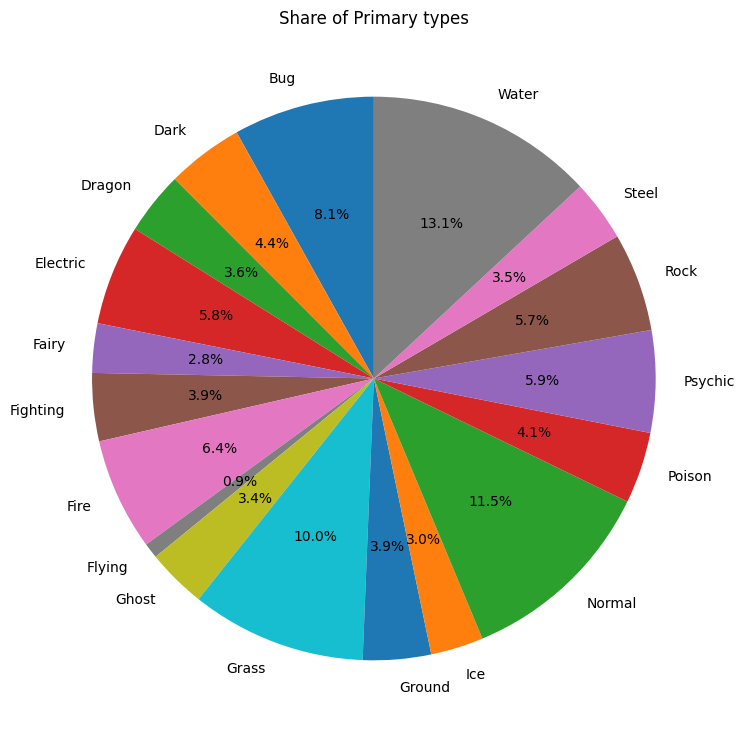

In [19]:
fig1, ax1 = plt.subplots(figsize=(8,9))
ax1.pie(type1_sizes, labels=type1_types, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Share of Primary types')
plt.show()

The most prevalent primary pokemon type across the generations is Water and the least prevalent is Flying.

In [20]:
type2_types = np.unique(pokemon_final['type_2'])
type2_sizes = []
number_of_type2_type = {}
for c in type2_types:
  a2,b2 = pokemon_final[pokemon_final["type_2"].isin([c])].shape
  type2_sizes.append(a2/a*100)
  number_of_type2_type[c] = a2

print(number_of_type2_type)
print(type2_sizes)

{'Bug': 9, 'Dark': 24, 'Dragon': 33, 'Electric': 10, 'Empty': 499, 'Fairy': 35, 'Fighting': 33, 'Fire': 15, 'Flying': 100, 'Ghost': 30, 'Grass': 24, 'Ground': 35, 'Ice': 17, 'Normal': 13, 'Poison': 41, 'Psychic': 42, 'Rock': 16, 'Steel': 29, 'Water': 20}
[0.878048780487805, 2.341463414634146, 3.2195121951219514, 0.975609756097561, 48.68292682926829, 3.414634146341464, 3.2195121951219514, 1.4634146341463417, 9.75609756097561, 2.9268292682926833, 2.341463414634146, 3.414634146341464, 1.6585365853658538, 1.2682926829268293, 4.0, 4.097560975609756, 1.5609756097560976, 2.829268292682927, 1.951219512195122]


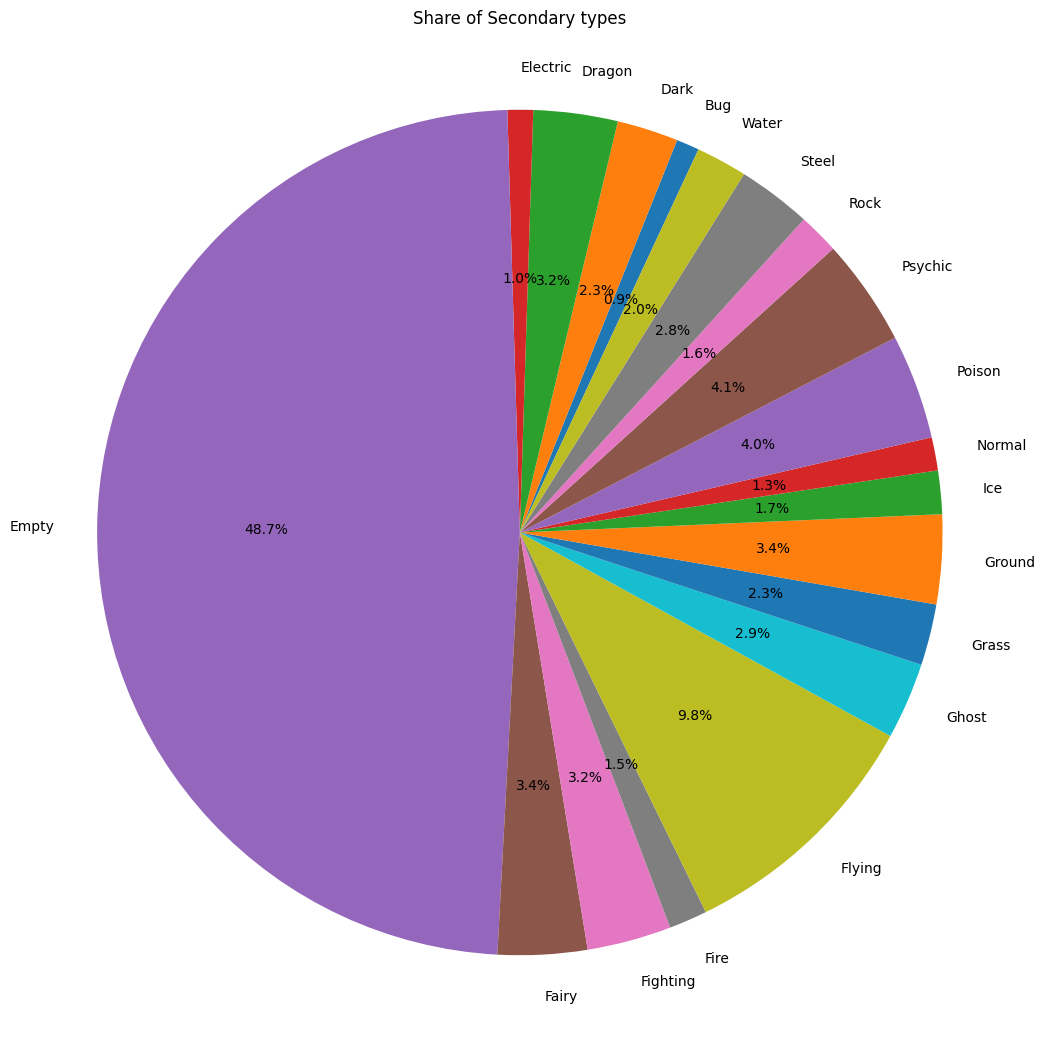

In [21]:
fig1, ax1 = plt.subplots(figsize=(12,13))
ax1.pie(type2_sizes, labels=type2_types, autopct='%1.1f%%',
        shadow=False, startangle=65)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Share of Secondary types')
plt.show()

The most prevalent secondary pokemon type across the generations is Flying,
and the least prevalent is Bug.\
Almost half of all pokemon only have a primary type

In [22]:
ev_types = np.unique(pokemon_final['evolution_chain_id'])
number_of_ev_types = {}
for c in ev_types:
  a2,b2 = pokemon_final[pokemon_final["evolution_chain_id"].isin([c])].shape
  number_of_ev_types[c] = a2


count_non_ev = sum(value == 1 for value in number_of_ev_types.values())
count_1ev = sum(value == 2 for value in number_of_ev_types.values())
count_2ev = sum(value == 3 for value in number_of_ev_types.values())
count_3ev = sum(value == 4 for value in number_of_ev_types.values())
count_4ev = sum(value == 5 for value in number_of_ev_types.values())
count_8ev = sum(value == 9 for value in number_of_ev_types.values())
count_ev = len(pokemon_final["evolution_chain_id"]) - count_non_ev


print(count_non_ev, 'pokemon have no evolutions')
print(count_1ev, 'pokemon have 1 evolution')
print(count_2ev, 'evolutionary lines consist of 3 species. Either sequential of 3 species or 2 alternative evolution-species')
print(count_3ev, 'evolutionary lines consist of 4 species')
print(count_4ev, 'evolutionary lines consist of 5 species')
print(count_8ev, 'evolutionary lines consist of 9 species')
print(count_ev, 'pokemon are part of an evolutionary line') 

201 pokemon have no evolutions
211 pokemon have 1 evolution
121 evolutionary lines consist of 3 species. Either sequential of 3 species or 2 alternative evolution-species
5 evolutionary lines consist of 4 species
2 evolutionary lines consist of 5 species
1 evolutionary lines consist of 9 species
824 pokemon are part of an evolutionary line


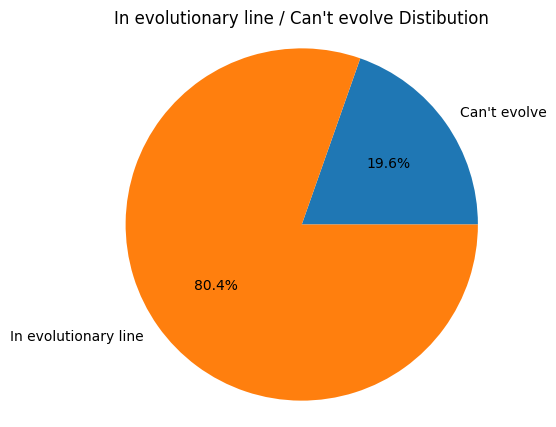

In [23]:
ev_sizes = [count_non_ev, count_ev]
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(ev_sizes, labels=['Can\'t evolve', 'In evolutionary line'], autopct='%1.1f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('In evolutionary line / Can\'t evolve Distibution')
plt.show()

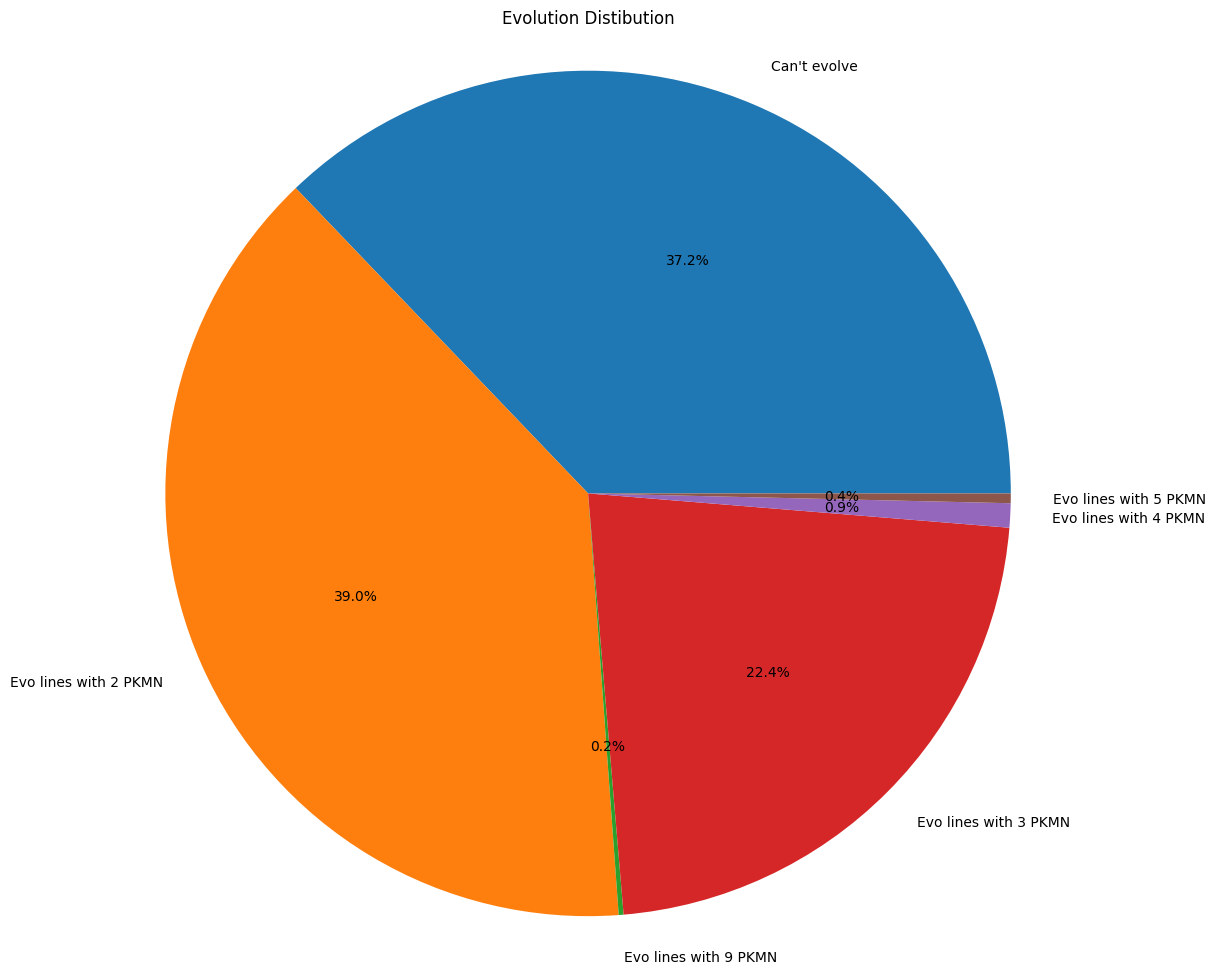

In [24]:
ev_sizes = [count_non_ev, count_1ev, count_8ev, count_2ev, count_3ev, count_4ev]
fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(ev_sizes, labels=['Can\'t evolve', 'Evo lines with 2 PKMN', 'Evo lines with 9 PKMN', 'Evo lines with 3 PKMN', 'Evo lines with 4 PKMN', 'Evo lines with 5 PKMN'], autopct='%1.1f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Evolution Distibution')
plt.show()

In [25]:
stats_features = ['total', 'hp', 'atk', 'def', 'sp_atk', 'sp_def', 'speed']

In [26]:
print('Best starter pokemon by generation')
for gen in range(1, 4):
    print(f'Generation {gen}:')
    starters_gen = pokemon_final[(pokemon_final['pkmn_classes'] == 'Starter') & (pokemon_final['generation'] == gen)]
    
    if starters_gen.empty:
        print('No starter Pokemon found for this generation.')
    else:
        best_starter = starters_gen.loc[starters_gen['total'].idxmax()]
        print(f'Best Starter: {best_starter["name"]}, Total={best_starter["total"]}')
        
    print('')

Best starter pokemon by generation
Generation 1:
Best Starter: Charizard, Total=534

Generation 2:
Best Starter: Typhlosion, Total=534

Generation 3:
Best Starter: Swampert, Total=535



In [27]:
print('Top 6 Pokémon by generation')
for gen in range(1, 4):
    print(f'Generation {gen}:')
    team_by_gen = pokemon_final[pokemon_final['generation'] == gen]

    best_team = team_by_gen.sort_values(by='total', ascending=False)[:6]
    for j, (_, row) in enumerate(best_team.iterrows(), start=1):
            print(f'Top {j}: {row["name"]}, Total={row["total"]}')
        
    print('')

Top 6 Pokémon by generation
Generation 1:
Top 1: Mewtwo, Total=680
Top 2: Mew, Total=600
Top 3: Dragonite, Total=600
Top 4: Articuno, Total=580
Top 5: Moltres, Total=580
Top 6: Zapdos, Total=580

Generation 2:
Top 1: Ho-oh, Total=680
Top 2: Lugia, Total=680
Top 3: Celebi, Total=600
Top 4: Tyranitar, Total=600
Top 5: Suicune, Total=580
Top 6: Raikou, Total=580

Generation 3:
Top 1: Rayquaza, Total=680
Top 2: Slaking, Total=670
Top 3: Groudon, Total=670
Top 4: Kyogre, Total=670
Top 5: Deoxys-normal, Total=600
Top 6: Latios, Total=600



In [28]:
print('Top 6 Non-Legendary Pokémon by generation')
for gen in range(1, 4):
    print(f'Generation {gen}:')
    team_by_gen = pokemon_final[(pokemon_final['pkmn_classes'] != 'Legendary') & (pokemon_final['generation'] == gen)]

    best_team = team_by_gen.sort_values(by='total', ascending=False)[:6]
    for j, (_, row) in enumerate(best_team.iterrows(), start=1):
            print(f'Top {j}: {row["name"]}, Total={row["total"]}')
        
    print('')

Top 6 Non-Legendary Pokémon by generation
Generation 1:
Top 1: Mew, Total=600
Top 2: Dragonite, Total=600
Top 3: Arcanine, Total=555
Top 4: Gyarados, Total=540
Top 5: Snorlax, Total=540
Top 6: Lapras, Total=535

Generation 2:
Top 1: Celebi, Total=600
Top 2: Tyranitar, Total=600
Top 3: Blissey, Total=540
Top 4: Kingdra, Total=540
Top 5: Crobat, Total=535
Top 6: Typhlosion, Total=534

Generation 3:
Top 1: Slaking, Total=670
Top 2: Deoxys-normal, Total=600
Top 3: Metagross, Total=600
Top 4: Jirachi, Total=600
Top 5: Salamence, Total=600
Top 6: Milotic, Total=540



In [29]:
print('Top 6 Common Pokémon by generation')
for gen in range(1, 4):
    print(f'Generation {gen}:')
    team_by_gen = pokemon_final[(pokemon_final['pkmn_classes'] != 'Legendary') & (pokemon_final['pkmn_classes'] != 'Mythical') & (pokemon_final['generation'] == gen)]

    best_team = team_by_gen.sort_values(by='total', ascending=False)[:6]
    for j, (_, row) in enumerate(best_team.iterrows(), start=1):
            print(f'Top {j}: {row["name"]}, Total={row["total"]}')
        
    print('')

Top 6 Common Pokémon by generation
Generation 1:
Top 1: Dragonite, Total=600
Top 2: Arcanine, Total=555
Top 3: Snorlax, Total=540
Top 4: Gyarados, Total=540
Top 5: Lapras, Total=535
Top 6: Charizard, Total=534

Generation 2:
Top 1: Tyranitar, Total=600
Top 2: Blissey, Total=540
Top 3: Kingdra, Total=540
Top 4: Crobat, Total=535
Top 5: Typhlosion, Total=534
Top 6: Feraligatr, Total=530

Generation 3:
Top 1: Slaking, Total=670
Top 2: Metagross, Total=600
Top 3: Salamence, Total=600
Top 4: Milotic, Total=540
Top 5: Swampert, Total=535
Top 6: Walrein, Total=530



In [50]:
print('Best Pokémon by generation by type')

# List of generations
generations = sorted(pokemon_final['generation'].unique())
types = sorted(pokemon_final['type_1'].unique())

for gen in generations[:3]:
    print(f'Generation {gen}:')
    for type in types:
        # Filter DataFrame by generation and type
        pokemon_gen_type = pokemon_final[(pokemon_final['generation'] == gen) & ((pokemon_final['type_1'] == type) | (pokemon_final['type_2'] == type))]
        
        if not pokemon_gen_type.empty:
            # Find the Pokémon with the highest total stats
            best_pokemon = pokemon_gen_type.loc[pokemon_gen_type['total'].idxmax()]
            print(f'Best {type.capitalize()} Pokémon: {best_pokemon["name"]}, Total={best_pokemon["total"]}')
        else:
            print(f'No {type.capitalize()} Pokémon found for this generation.')
        
    print('')

Best Pokémon by generation by type
Generation 1:
Best Bug Pokémon: Scyther, Total=500
No Dark Pokémon found for this generation.
Best Dragon Pokémon: Dragonite, Total=600
Best Electric Pokémon: Zapdos, Total=580
Best Fairy Pokémon: Clefable, Total=483
Best Fighting Pokémon: Poliwrath, Total=510
Best Fire Pokémon: Moltres, Total=580
Best Flying Pokémon: Dragonite, Total=600
Best Ghost Pokémon: Gengar, Total=500
Best Grass Pokémon: Exeggutor, Total=530
Best Ground Pokémon: Nidoqueen, Total=505
Best Ice Pokémon: Articuno, Total=580
Best Normal Pokémon: Snorlax, Total=540
Best Poison Pokémon: Venusaur, Total=525
Best Psychic Pokémon: Mewtwo, Total=680
Best Rock Pokémon: Aerodactyl, Total=515
Best Steel Pokémon: Magneton, Total=465
Best Water Pokémon: Gyarados, Total=540

Generation 2:
Best Bug Pokémon: Shuckle, Total=505
Best Dark Pokémon: Tyranitar, Total=600
Best Dragon Pokémon: Kingdra, Total=540
Best Electric Pokémon: Raikou, Total=580
Best Fairy Pokémon: Granbull, Total=450
Best Fight

In [31]:
print('Best Pokémon by stat by generation')

for gen in range(1, 4):
    print(f'Generation {gen}:')
    for stat_col in stats_features:
        pokemon_gen = pokemon_final[pokemon_final['generation'] == gen]
        best_pokemon = pokemon_gen.loc[pokemon_gen[stat_col].idxmax()]
        print(f'{stat_col}: {best_pokemon["name"]}, {stat_col}={best_pokemon[stat_col]}')
    print('')

Best Pokémon by stat by generation
Generation 1:
total: Mewtwo, total=680
hp: Chansey, hp=250
atk: Dragonite, atk=134
def: Cloyster, def=180
sp_atk: Mewtwo, sp_atk=154
sp_def: Articuno, sp_def=125
speed: Electrode, speed=150

Generation 2:
total: Lugia, total=680
hp: Blissey, hp=255
atk: Tyranitar, atk=134
def: Shuckle, def=230
sp_atk: Espeon, sp_atk=130
sp_def: Shuckle, sp_def=230
speed: Crobat, speed=130

Generation 3:
total: Rayquaza, total=680
hp: Wailord, hp=170
atk: Slaking, atk=160
def: Regirock, def=200
sp_atk: Kyogre, sp_atk=150
sp_def: Regice, sp_def=200
speed: Ninjask, speed=160



In [32]:
print('Top 5 legendary pokemon')
legendaries = pokemon_final.loc[pokemon_final['pkmn_classes'] == 'Legendary']
top_legendaries = legendaries.sort_values(by='total', ascending=False)[:5]
for j, (_, row) in enumerate(top_legendaries.iterrows(), start=1):
    print(f'Top {j}: {row["name"]}, Total={row["total"]}')
print('')

print('Top 5 mythical pokemon')
mythicals = pokemon_final.loc[pokemon_final['pkmn_classes'] == 'Mythical']
top_mythicals = mythicals.sort_values(by='total', ascending=False)[:5]
for j, (_, row) in enumerate(top_mythicals.iterrows(), start=1):
    print(f'Top {j}: {row["name"]}, Total={row["total"]}')
print('')

print('Top 5 common pokemon')
commons = pokemon_final.loc[pokemon_final['pkmn_classes'] == 'Ordinary']
top_commons = commons.sort_values(by='total', ascending=False)[:5]
for j, (_, row) in enumerate(top_commons.iterrows(), start=1):
    print(f'Top {j}: {row["name"]}, Total={row["total"]}')
print('')

print('Top 5 starter pokemon')
starters = pokemon_final.loc[pokemon_final['pkmn_classes'] == 'Starter']
top_starters = starters.sort_values(by='total', ascending=False)[:5]
for j, (_, row) in enumerate(top_starters.iterrows(), start=1):
    print(f'Top {j}: {row["name"]}, Total={row["total"]}')
print('')

print('Top 5 baby pokemon')
babies = pokemon_final.loc[pokemon_final['pkmn_classes'] == 'Baby']
top_babies = babies.sort_values(by='total', ascending=False)[:5]
for j, (_, row) in enumerate(top_babies.iterrows(), start=1):
    print(f'Top {j}: {row["name"]}, Total={row["total"]}')
print('')

Top 5 legendary pokemon
Top 1: Eternatus, Total=690
Top 2: Rayquaza, Total=680
Top 3: Zekrom, Total=680
Top 4: Reshiram, Total=680
Top 5: Yveltal, Total=680

Top 5 mythical pokemon
Top 1: Arceus, Total=720
Top 2: Mew, Total=600
Top 3: Genesect, Total=600
Top 4: Zarude, Total=600
Top 5: Melmetal, Total=600

Top 5 common pokemon
Top 1: Slaking, Total=670
Top 2: Salamence, Total=600
Top 3: Goodra, Total=600
Top 4: Kommo-o, Total=600
Top 5: Dragapult, Total=600

Top 5 starter pokemon
Top 1: Swampert, Total=535
Top 2: Infernape, Total=534
Top 3: Typhlosion, Total=534
Top 4: Delphox, Total=534
Top 5: Charizard, Total=534

Top 5 baby pokemon
Top 1: Munchlax, Total=390
Top 2: Magby, Total=365
Top 3: Elekid, Total=360
Top 4: Mantyke, Total=345
Top 5: Mime-jr, Total=310



C:\Users\fjend\AppData\Local\Temp\ipykernel_12808\1507411996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="pkmn_classes", y="total", data=pokemon_final, palette='Set2', order=custom_order)


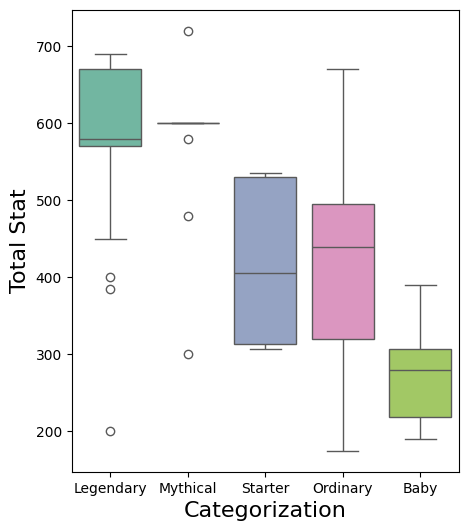

In [103]:
custom_order = ['Legendary', 'Mythical', 'Starter', 'Ordinary', 'Baby']

plt.figure(figsize=(5, 6))
sns.boxplot(x="pkmn_classes", y="total", data=pokemon_final, palette='Set2', order=custom_order)
plt.xlabel('Categorization', fontsize=16)
plt.ylabel('Total Stat', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show(True)

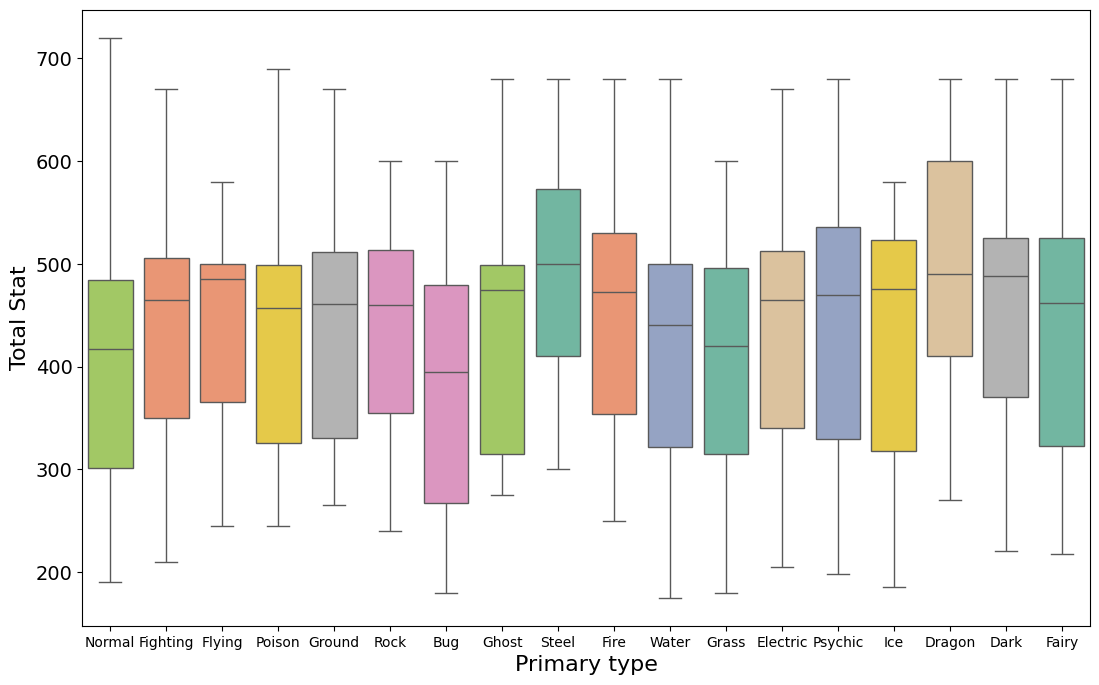

In [108]:
custom_order = ['Normal', 'Fighting', 'Flying', 'Poison', 'Ground', 
                'Rock', 'Bug', 'Ghost', 'Steel', 'Fire', 'Water',
                'Grass', 'Electric', 'Psychic', 'Ice', 'Dragon', 
                'Dark', 'Fairy']

plt.figure(figsize=(13,8))
sns.boxplot(x="type_1", y="total", hue="type_1", data=pokemon_final, palette='Set2', order=custom_order)
plt.xlabel('Primary type', fontsize=16)
plt.ylabel('Total Stat', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.show(True)

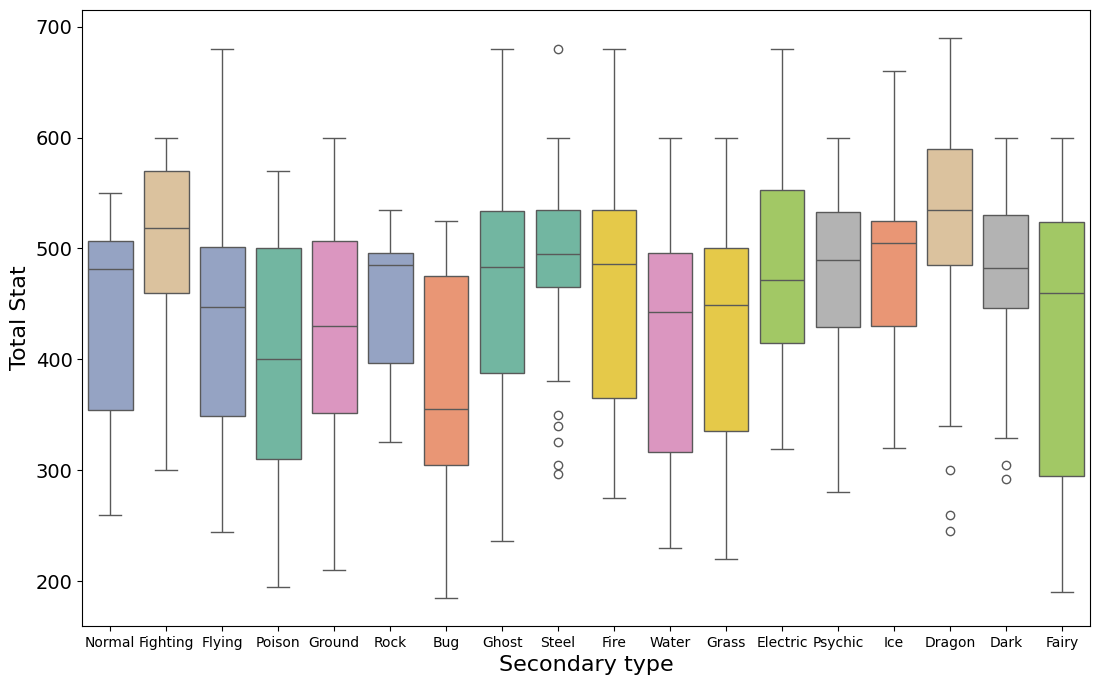

In [111]:
custom_order = ['Normal', 'Fighting', 'Flying', 'Poison', 'Ground', 
                'Rock', 'Bug', 'Ghost', 'Steel', 'Fire', 'Water',
                'Grass', 'Electric', 'Psychic', 'Ice', 'Dragon', 
                'Dark', 'Fairy']

plt.figure(figsize=(13,8))
sns.boxplot(x="type_2", y="total", hue="type_2", data=pokemon_final, palette='Set2', order=custom_order)
plt.xlabel('Secondary type', fontsize=16)
plt.ylabel('Total Stat', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.show(True)

In [64]:
# Find the maximum species_id for each evolution_chain_id
last_pkmn_per_chain = pokemon_final.groupby('evolution_chain_id')[['order']].max().reset_index()

# Filter to get the final evolved Pokémon
final_staged_pokemon = pokemon_final[pokemon_final['order'].isin(last_pkmn_per_chain['order'])]


# Count occurrences of each evolution_chain_id
chain_id_counts = pokemon_final['evolution_chain_id'].value_counts()

# Find evolution_chain_ids with only one occurrence
unique_chains = chain_id_counts[chain_id_counts == 1].index

legendaries = pokemon_final.loc[(pokemon_final['pkmn_classes'] == 'Legendary') | (pokemon_final['pkmn_classes'] == 'Mythical')]

# Filter to get the final stage evolved Pokémon
final_evo_pokemon = final_staged_pokemon[~final_staged_pokemon['evolution_chain_id'].isin(unique_chains)]
common_final_evo_pokemon = final_evo_pokemon[~(final_evo_pokemon['pkmn_classes'].isin(legendaries['pkmn_classes']))]
uncommon_final_evo_pokemon = final_evo_pokemon[(final_evo_pokemon['pkmn_classes'].isin(legendaries['pkmn_classes']))]

# Filter to get the non evolving Pokémon
non_evolved_pokemon = final_staged_pokemon[final_staged_pokemon['evolution_chain_id'].isin(unique_chains)]
common_non_evolved_pokemon = non_evolved_pokemon[~(non_evolved_pokemon['pkmn_classes'].isin(legendaries['pkmn_classes']))]
uncommon_non_evolved_pokemon = non_evolved_pokemon[(non_evolved_pokemon['pkmn_classes'].isin(legendaries['pkmn_classes']))]



# Calculate the average total value for final stage evolved Pokémon
avg_total_final_evolved = final_evo_pokemon['total'].mean()

# Calculate the average total value for final stage evolved copmmon Pokémon
avg_total_final_evolved_common = common_final_evo_pokemon['total'].mean()

# Calculate the average total value for final stage evolved copmmon Pokémon
avg_total_final_evolved_uncommon = uncommon_final_evo_pokemon['total'].mean()

# Calculate the average total value for non evolved Pokémon
avg_total_non_evolved = non_evolved_pokemon['total'].mean()

# Calculate the average total value for non evolved common Pokémon
avg_total_non_evolved_common = common_non_evolved_pokemon['total'].mean()

# Calculate the average total value for non evolved common Pokémon
avg_total_non_evolved_uncommon = uncommon_non_evolved_pokemon['total'].mean()


# Compare averages
print("Comparison of average total values:")
print(f"Average total value of final stage evolved Pokémon: {round(avg_total_final_evolved,1)}")
print(f"Average total value of final stage evolved common Pokémon: {round(avg_total_final_evolved_common,1)}")
print(f"Average total value of final stage evolved Legendary or Mythical Pokémon: {round(avg_total_final_evolved_uncommon,1)}")
print(f"Average total value of Pokémon that do not evolve: {round(avg_total_non_evolved,1)}")
print(f"Average total value of common Pokémon that do not evolve: {round(avg_total_non_evolved_common,1)}")
print(f"Average total value of Legendary or Mythical Pokémon that do not evolve: {round(avg_total_non_evolved_uncommon,1)}")

print('')
if avg_total_final_evolved > avg_total_non_evolved:
    print("Final stage evolved Pokémon have a higher average total value.")
elif avg_total_final_evolved < avg_total_non_evolved:
    print("Pokémon that do not evolve have a higher average total value.")
else:
    print("Both groups have the same average total value.")

Comparison of average total values:
Average total value of final stage evolved Pokémon: 480.6
Average total value of final stage evolved common Pokémon: 479.4
Average total value of final stage evolved Legendary or Mythical Pokémon: 555.7
Average total value of Pokémon that do not evolve: 533.6
Average total value of common Pokémon that do not evolve: 484.5
Average total value of Legendary or Mythical Pokémon that do not evolve: 602.0

Pokémon that do not evolve have a higher average total value.


Shortcoming of the script above: it only takes the latest final evolution with the highest order # into acount \
It doesn't factor in if a evolutionary line has multiple alternative final stage evolutions \
E.g. Bellosom is included in final_evo_pokemon, but Vileplume is not. \
Another shortcoming is that some pokemon like Phione and Manaphy have the same evolution_chain_id, but are not evolutions of each other